## Lab 9: Isentropic Potential Vorticity Anomalies
In this week's lab, we will use archived GFS model data to create vertical cross-sections to assist in analyzing IPV anomalies.

<br />


### Useful Documentation
1. Xarray open_dataset:  https://docs.xarray.dev/en/stable/generated/xarray.open_dataset.html
2. Matplotlib Contour: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.contour.html
3. Datetime: https://docs.python.org/3/library/datetime.html
4. Scipy Gaussian Filter: https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.gaussian_filter.html
5. MetPy Potential Temperature: https://unidata.github.io/MetPy/latest/api/generated/metpy.calc.potential_temperature.html




<br />

## Tutorial Part I


In this week's lab, we will create vertical cross-sections of potential temperature and the meridional wind.  In this week's tutorial, I am going to show you how to create a simple vertical cross-section across the United States at 45°N.

<br />

1. First, we open a sample dataset with pressure as the vertical coordinate, here representing a GFS analysis from February 9th, 2023.


In [1]:
from datetime import datetime
import xarray as xr

time = datetime(2023,2,9,0)
data_location = "/data/AtmSci360/Synp2/Lab_8/"
file_name = f"{time:%m%d%y_%H}_gfs.grib2"

data = xr.open_dataset(f"{data_location}{file_name}", engine='cfgrib', filter_by_keys={'typeOfLevel': 'isobaricInhPa'})
data

skipping variable: paramId==228164 shortName='tcc'
Traceback (most recent call last):
  File "/opt/tljh/user/lib/python3.7/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/opt/tljh/user/lib/python3.7/site-packages/cfgrib/dataset.py", line 609, in dict_merge
    "key=%r value=%r new_value=%r" % (key, master[key], value)
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='isobaricInhPa' value=Variable(dimensions=('isobaricInhPa',), data=array([1000.,  975.,  950.,  925.,  900.,  850.,  800.,  750.,  700.,
        650.,  600.,  550.,  500.,  450.,  400.,  350.,  300.,  250.,
        200.,  150.,  100.,   70.,   50.,   40.,   30.,   20.,   15.,
         10.,    7.,    5.,    3.,    2.,    1.])) new_value=Variable(dimensions=('isobaricInhPa',), data=array([1000.,  975.,  950.,  925.,  900.,  850.,  800.,  750.,  700.,
        650.,  600.,  550.,  500.,  450.,  400.,  350.,  300.,  250.,
        

<xarray.Dataset>
Dimensions:        (isobaricInhPa: 33, latitude: 721, longitude: 1440)
Coordinates:
    time           datetime64[ns] ...
    step           timedelta64[ns] ...
  * isobaricInhPa  (isobaricInhPa) float64 1e+03 975.0 950.0 ... 3.0 2.0 1.0
  * latitude       (latitude) float64 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * longitude      (longitude) float64 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
    valid_time     datetime64[ns] ...
Data variables:
    gh             (isobaricInhPa, latitude, longitude) float32 ...
    t              (isobaricInhPa, latitude, longitude) float32 ...
    r              (isobaricInhPa, latitude, longitude) float32 ...
    q              (isobaricInhPa, latitude, longitude) float32 ...
    w              (isobaricInhPa, latitude, longitude) float32 ...
    wz             (isobaricInhPa, latitude, longitude) float32 ...
    u              (isobaricInhPa, latitude, longitude) float32 ...
    v              (isobaricInhPa, latitude, longitude) float32 ...
    absv           (isobaricInhPa, latitude, longitude) float32 ...
    o3mr           (isobaricInhPa, latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP 
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP 
    history:                 2023-05-03T15:38 GRIB to CDM+CF via cfgrib-0.9.1...

<br />

2. Next, we calculate potential temperature and save it back to the data xarray.

In [2]:
import metpy.calc as calc
pt = calc.potential_temperature(data.isobaricInhPa, data.t)
data = data.assign(pt=pt)

<br />

3. We are now ready to slice the data so that it represents a single vertical cross-section.  This requires two slice operations: first selecting the points at 45&deg;N latitude, then retaining only those between 115&deg;W and 75&deg;W longitude.  

In [3]:
cross = data.sel(latitude=45)
cross = cross.sel(longitude = slice(360-115,360-75))
cross

Magnitude,[[278.4844970703125 278.1244812011719 277.7344970703125 ... 273.5744934082031 273.67449951171875 273.8544921875] [279.16022678087364 278.78754554148605 278.4047818667207 ... 275.9772818538802 275.6851678801174 275.33265151148515] [279.85264757046565 279.4873477042806 279.0915752144667 ... 276.96056642404676 276.89968311301595 276.7576323766484] ... [1235.8694878360031 1238.1304795354765 1239.3398024085527 ... 1214.3116408230032 1219.096380966415 1223.0398983722027] [1399.8384751015496 1398.9529357315428 1399.5432652830846 ... 1389.329654178986 1386.672945983576 1391.27793087839] [1785.969027461728 1786.976583011317 1788.4159323942556 ... 1784.8175040292497 1786.4727503288632 1786.4008212950778]]
Units,kelvin


<br />

4.  Finally, we are ready to create our plot.  We use matplotlib's contour functionality to do so, noting that we do not need to provide a coordinate transform since we are not plotting data on a map.  In this case, our x-axis is longitude and our y-axis is the natural logarithm of pressure.  I've added comments below so you can better follow along.

[Text(0, 1000, '1000'),
 Text(0, 900, '900'),
 Text(0, 800, '800'),
 Text(0, 700, '700'),
 Text(0, 600, '600'),
 Text(0, 500, '500'),
 Text(0, 400, '400'),
 Text(0, 300, '300'),
 Text(0, 200, '200'),
 Text(0, 100, '100')]

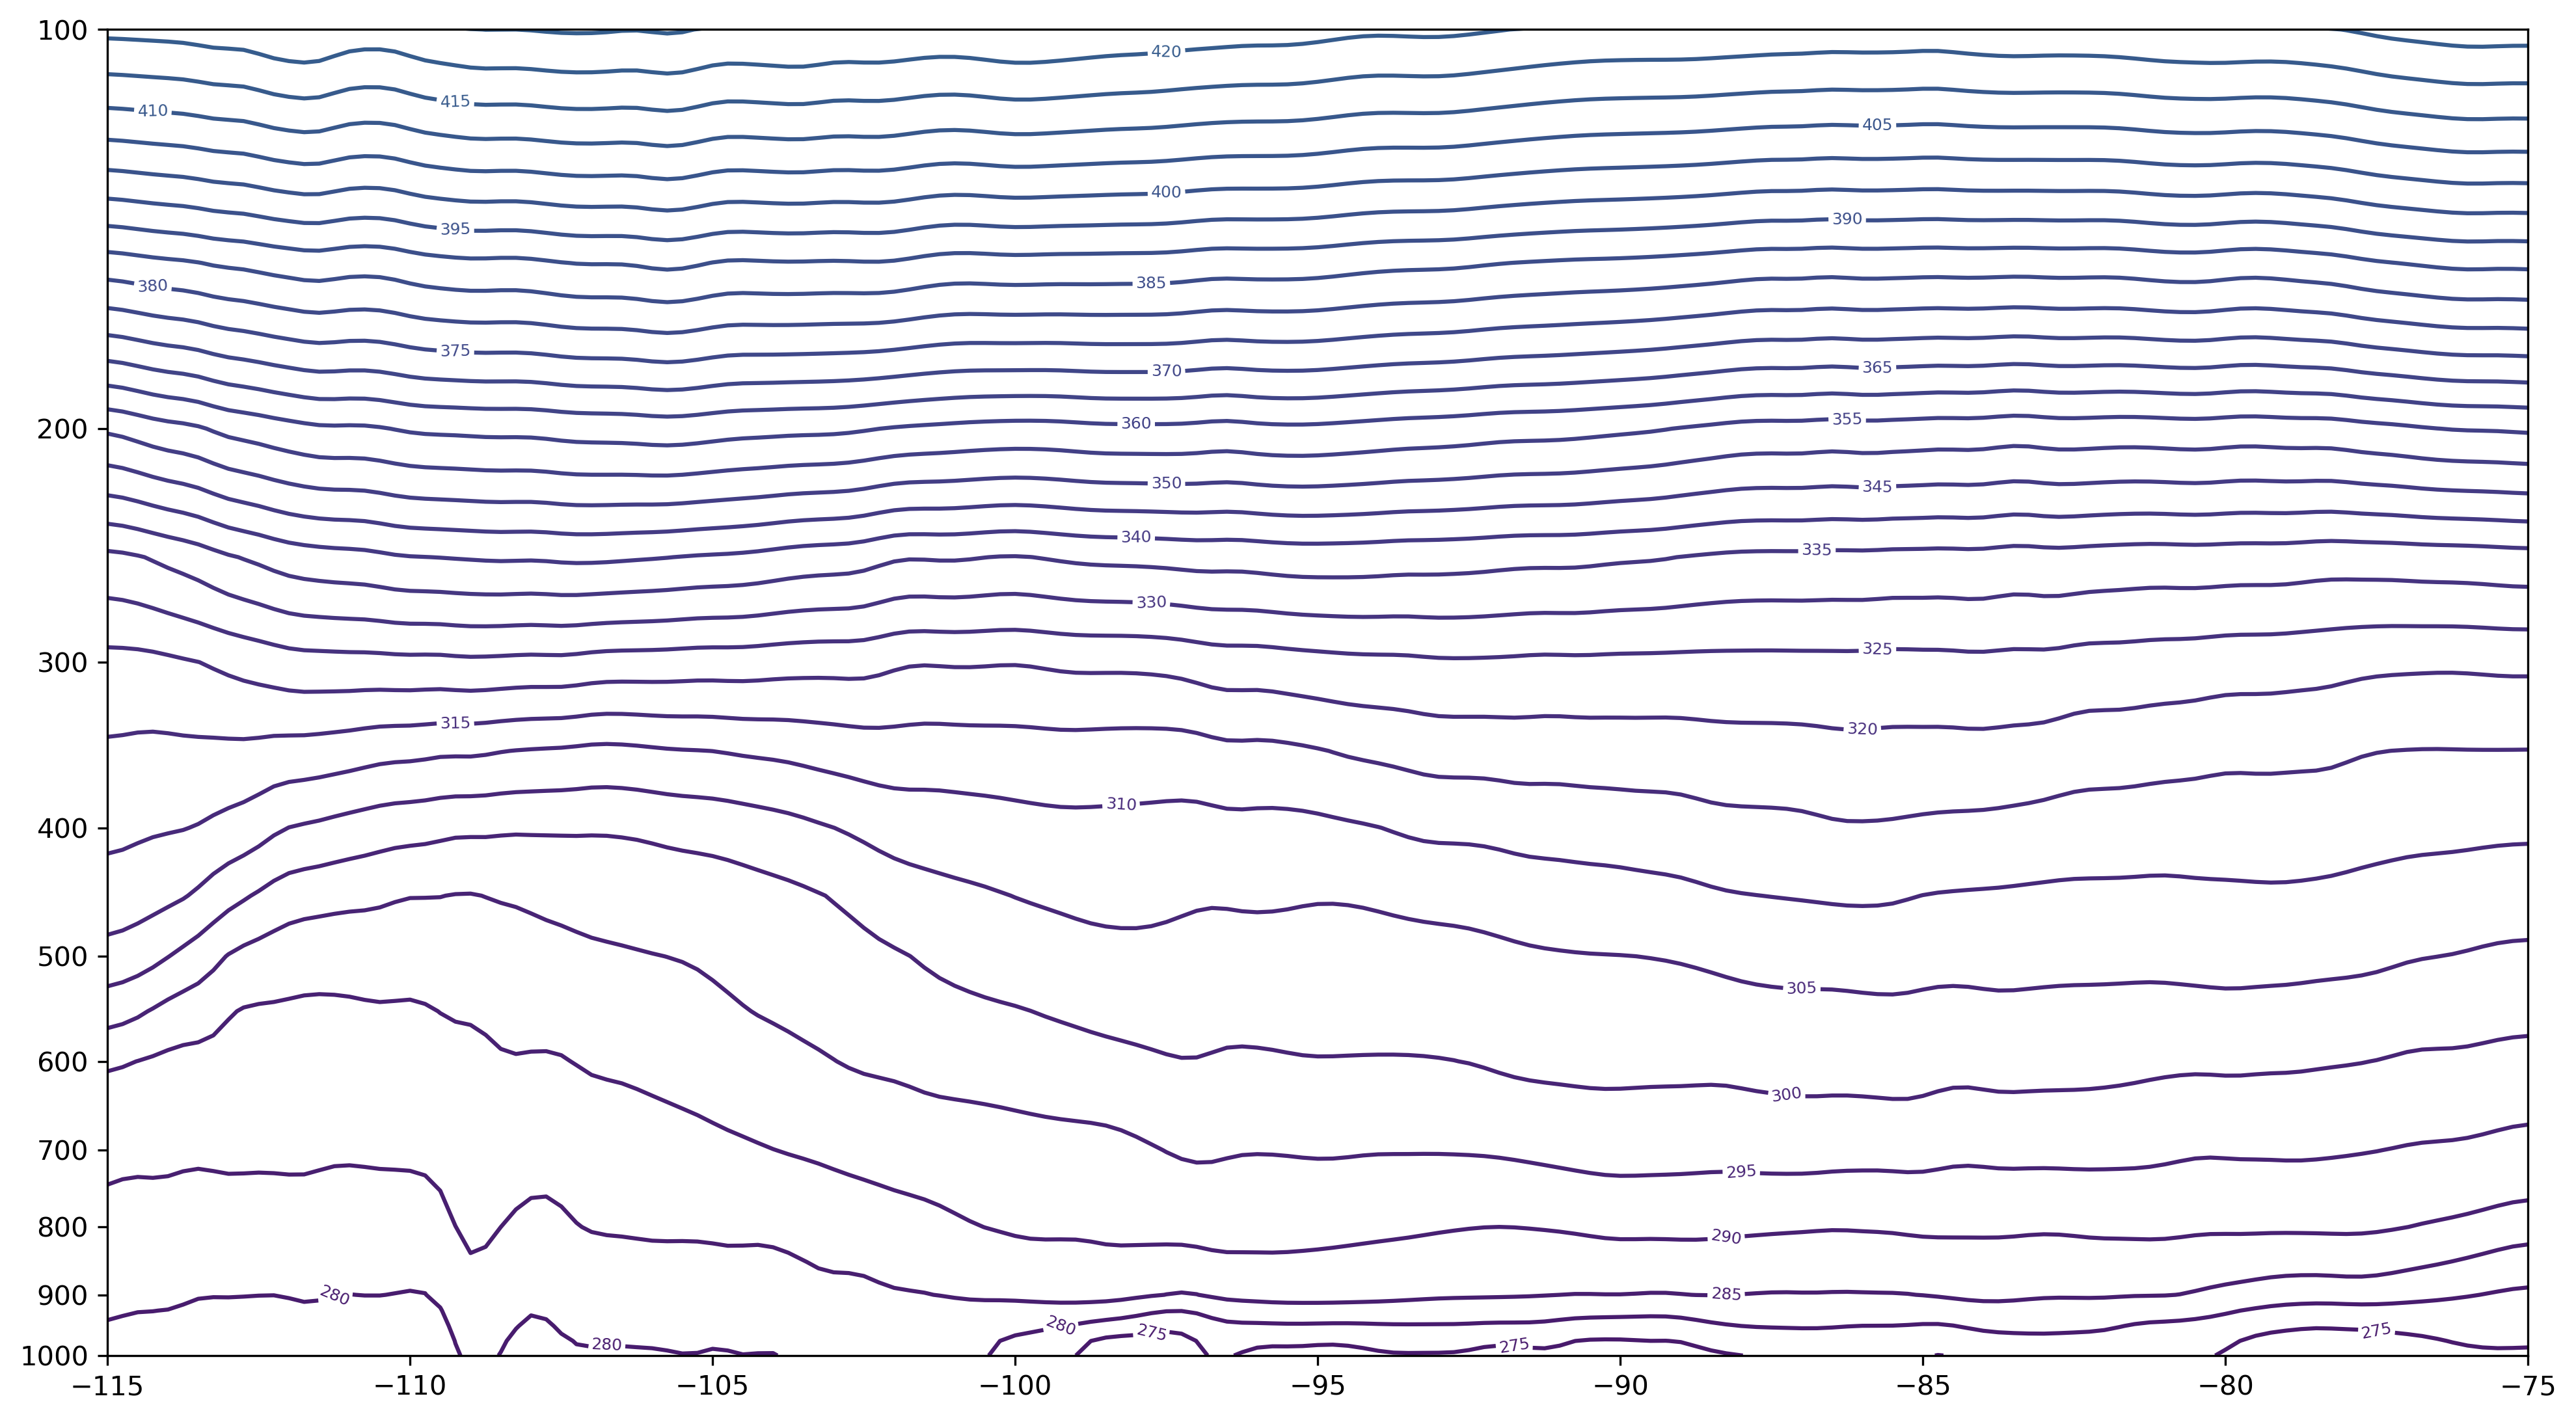

In [4]:
"""
Import the usual packages for plotting.
"""
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter
import numpy as np

"""
Generate a blank figure and subplot.  Note we do not need to provide a projection since we are not
plotting on a map.
"""
fig = plt.figure(figsize=(16,9), dpi=300)
ax = plt.subplot()

"""
The contour statement, indicating longitude at the x-axis variable and pressure as the y-axis variable.
Gaussian-smoothed potential temperature is what is plotted in labeled contours with a 5 K contour interval.
"""
cont = plt.contour(cross.longitude-360, cross.isobaricInhPa.values, gaussian_filter(cross.pt.values,1), np.arange(230,900,5))
ax.clabel(cont, cont.levels, inline=True, fontsize=6)

"""
Set the y-axis as natural logarithmic.
"""
ax.set_yscale('symlog')

"""
Set the y-axis limits to 1000 hPa at the bottom and 100 hPa at the top.
"""
plt.ylim(1000,100)

"""
This changes the tick labels.  By default, matplotlib uses scientific notation for natural logarithm axis labels.
Manually specifying the tick locations and their labels addresses this issue.
"""
ax.set_yticks(np.arange(1000, 50, -100))
ax.set_yticklabels(np.arange(1000, 50, -100))

### Instructions
So that you can complete this week's lab, I have locally archived the March 7th, 2023 1200 UTC GFS analysis.  The location of these data is provided for you below, as is the filename convention if you wish to use a datetime object to select your time of interest.

Create the following maps and plots for March 7th, 2023 at 1200 UTC:

<ul>
    <li>Vertical cross-section between 1000-100 hPa of potential temperature and the meridional wind at 45&deg;N between 145&deg;W and 80&deg;W</li>
    <li>Vertical cross-section between 1000-100 hPa of potential temperature and the meridional wind at 25&deg;N between 120&deg;W and 85&deg;W</li>
</ul>
    
Be sure your maps follow the "good map" guidelines, and do not forget to import the necessary packages before you start coding.

In [1]:
from datetime import datetime
from metpy.io import add_station_lat_lon
from metpy.plots import StationPlot, sky_cover
import numpy as np
import cartopy.crs as crs 
import cartopy
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter
import xarray as xr
import sys
from metpy.units import units
import metpy.calc as calc
import pandas as pd

In [2]:
'''
data_location = "/data/AtmSci360/Synp2/Lab_9/"
file_name = f"{time:%m%d%y_%H}_gfs.grib2"
'''

'\ndata_location = "/data/AtmSci360/Synp2/Lab_9/"\nfile_name = f"{time:%m%d%y_%H}_gfs.grib2"\n'

In [3]:
def process_upper_air_data(time):
    data_location = "/data/AtmSci360/Synp2/Lab_9/"

    file_name = f"{time:%m%d%y_%H}_gfs.grib2"
    model_data = xr.open_dataset(f"{data_location}{time:%m%d%y_%H}_gfs.grib2", engine='cfgrib', filter_by_keys={'typeOfLevel': 'isobaricInhPa'})
    model_data['t'] = model_data["t"].metpy.convert_units('degC')
    model_data['u'] = model_data["u"].metpy.convert_units('kt')
    model_data['v'] = model_data["v"].metpy.convert_units('kt')
    pt = calc.potential_temperature(model_data.isobaricInhPa, model_data.t)
    model_data = model_data.assign(pt=pt)

   
    
    return model_data

In [4]:
def cross_section1(model_data,time):
    cross=model_data.sel(latitude=45)
    cross = cross.sel(longitude = slice(360-145,360-80))
    
    fig = plt.figure(figsize=(16,9), dpi=300)
    ax = plt.subplot()

    cont = plt.contour(cross.longitude-360, cross.isobaricInhPa.values, gaussian_filter(cross.pt.values,1), np.arange(230,900,5),colors='g')
    ax.clabel(cont, cont.levels, inline=True, fontsize=6)


    ax.set_yscale('symlog')


    plt.ylim(1000,100)
   
        
    contw = plt.contourf(cross.longitude-360,cross.isobaricInhPa,gaussian_filter(cross.v.values,0),np.arange(-80,80,4), cmap='gist_ncar')
           
    
    cbar = plt.colorbar(contw)
    cbar.set_label(("Wind Speed (kt)"), size=10, weight="bold")

    ax.set_yticks(np.arange(1000, 50, -100))
    ax.set_yticklabels(np.arange(1000, 50, -100))
    
    plt.title(f"Valid: {time:%m/%d/%Y %H%M} UTC", size=7, loc="right")         
    plt.title("GFS Vertical Cross Section, Potential Temperature (Green|K), Meridional Wind (Shaded|Kts, Pos= In page, Neg= Out Page) ",size=7,weight="bold",loc="left")

Can't create file '/data/AtmSci360/Synp2/Lab_9/030723_12_gfs.grib2.923a8.idx'
Traceback (most recent call last):
  File "/opt/tljh/user/lib/python3.7/site-packages/cfgrib/messages.py", line 534, in from_indexpath_or_filestream
    with compat_create_exclusive(indexpath) as new_index_file:
  File "/opt/tljh/user/lib/python3.7/contextlib.py", line 112, in __enter__
    return next(self.gen)
  File "/opt/tljh/user/lib/python3.7/site-packages/cfgrib/messages.py", line 500, in compat_create_exclusive
    fd = os.open(path, os.O_WRONLY | os.O_CREAT | os.O_EXCL)
PermissionError: [Errno 13] Permission denied: '/data/AtmSci360/Synp2/Lab_9/030723_12_gfs.grib2.923a8.idx'
Can't read index file '/data/AtmSci360/Synp2/Lab_9/030723_12_gfs.grib2.923a8.idx'
Traceback (most recent call last):
  File "/opt/tljh/user/lib/python3.7/site-packages/cfgrib/messages.py", line 544, in from_indexpath_or_filestream
    index_mtime = os.path.getmtime(indexpath)
  File "/opt/tljh/user/lib/python3.7/genericpath.py", 

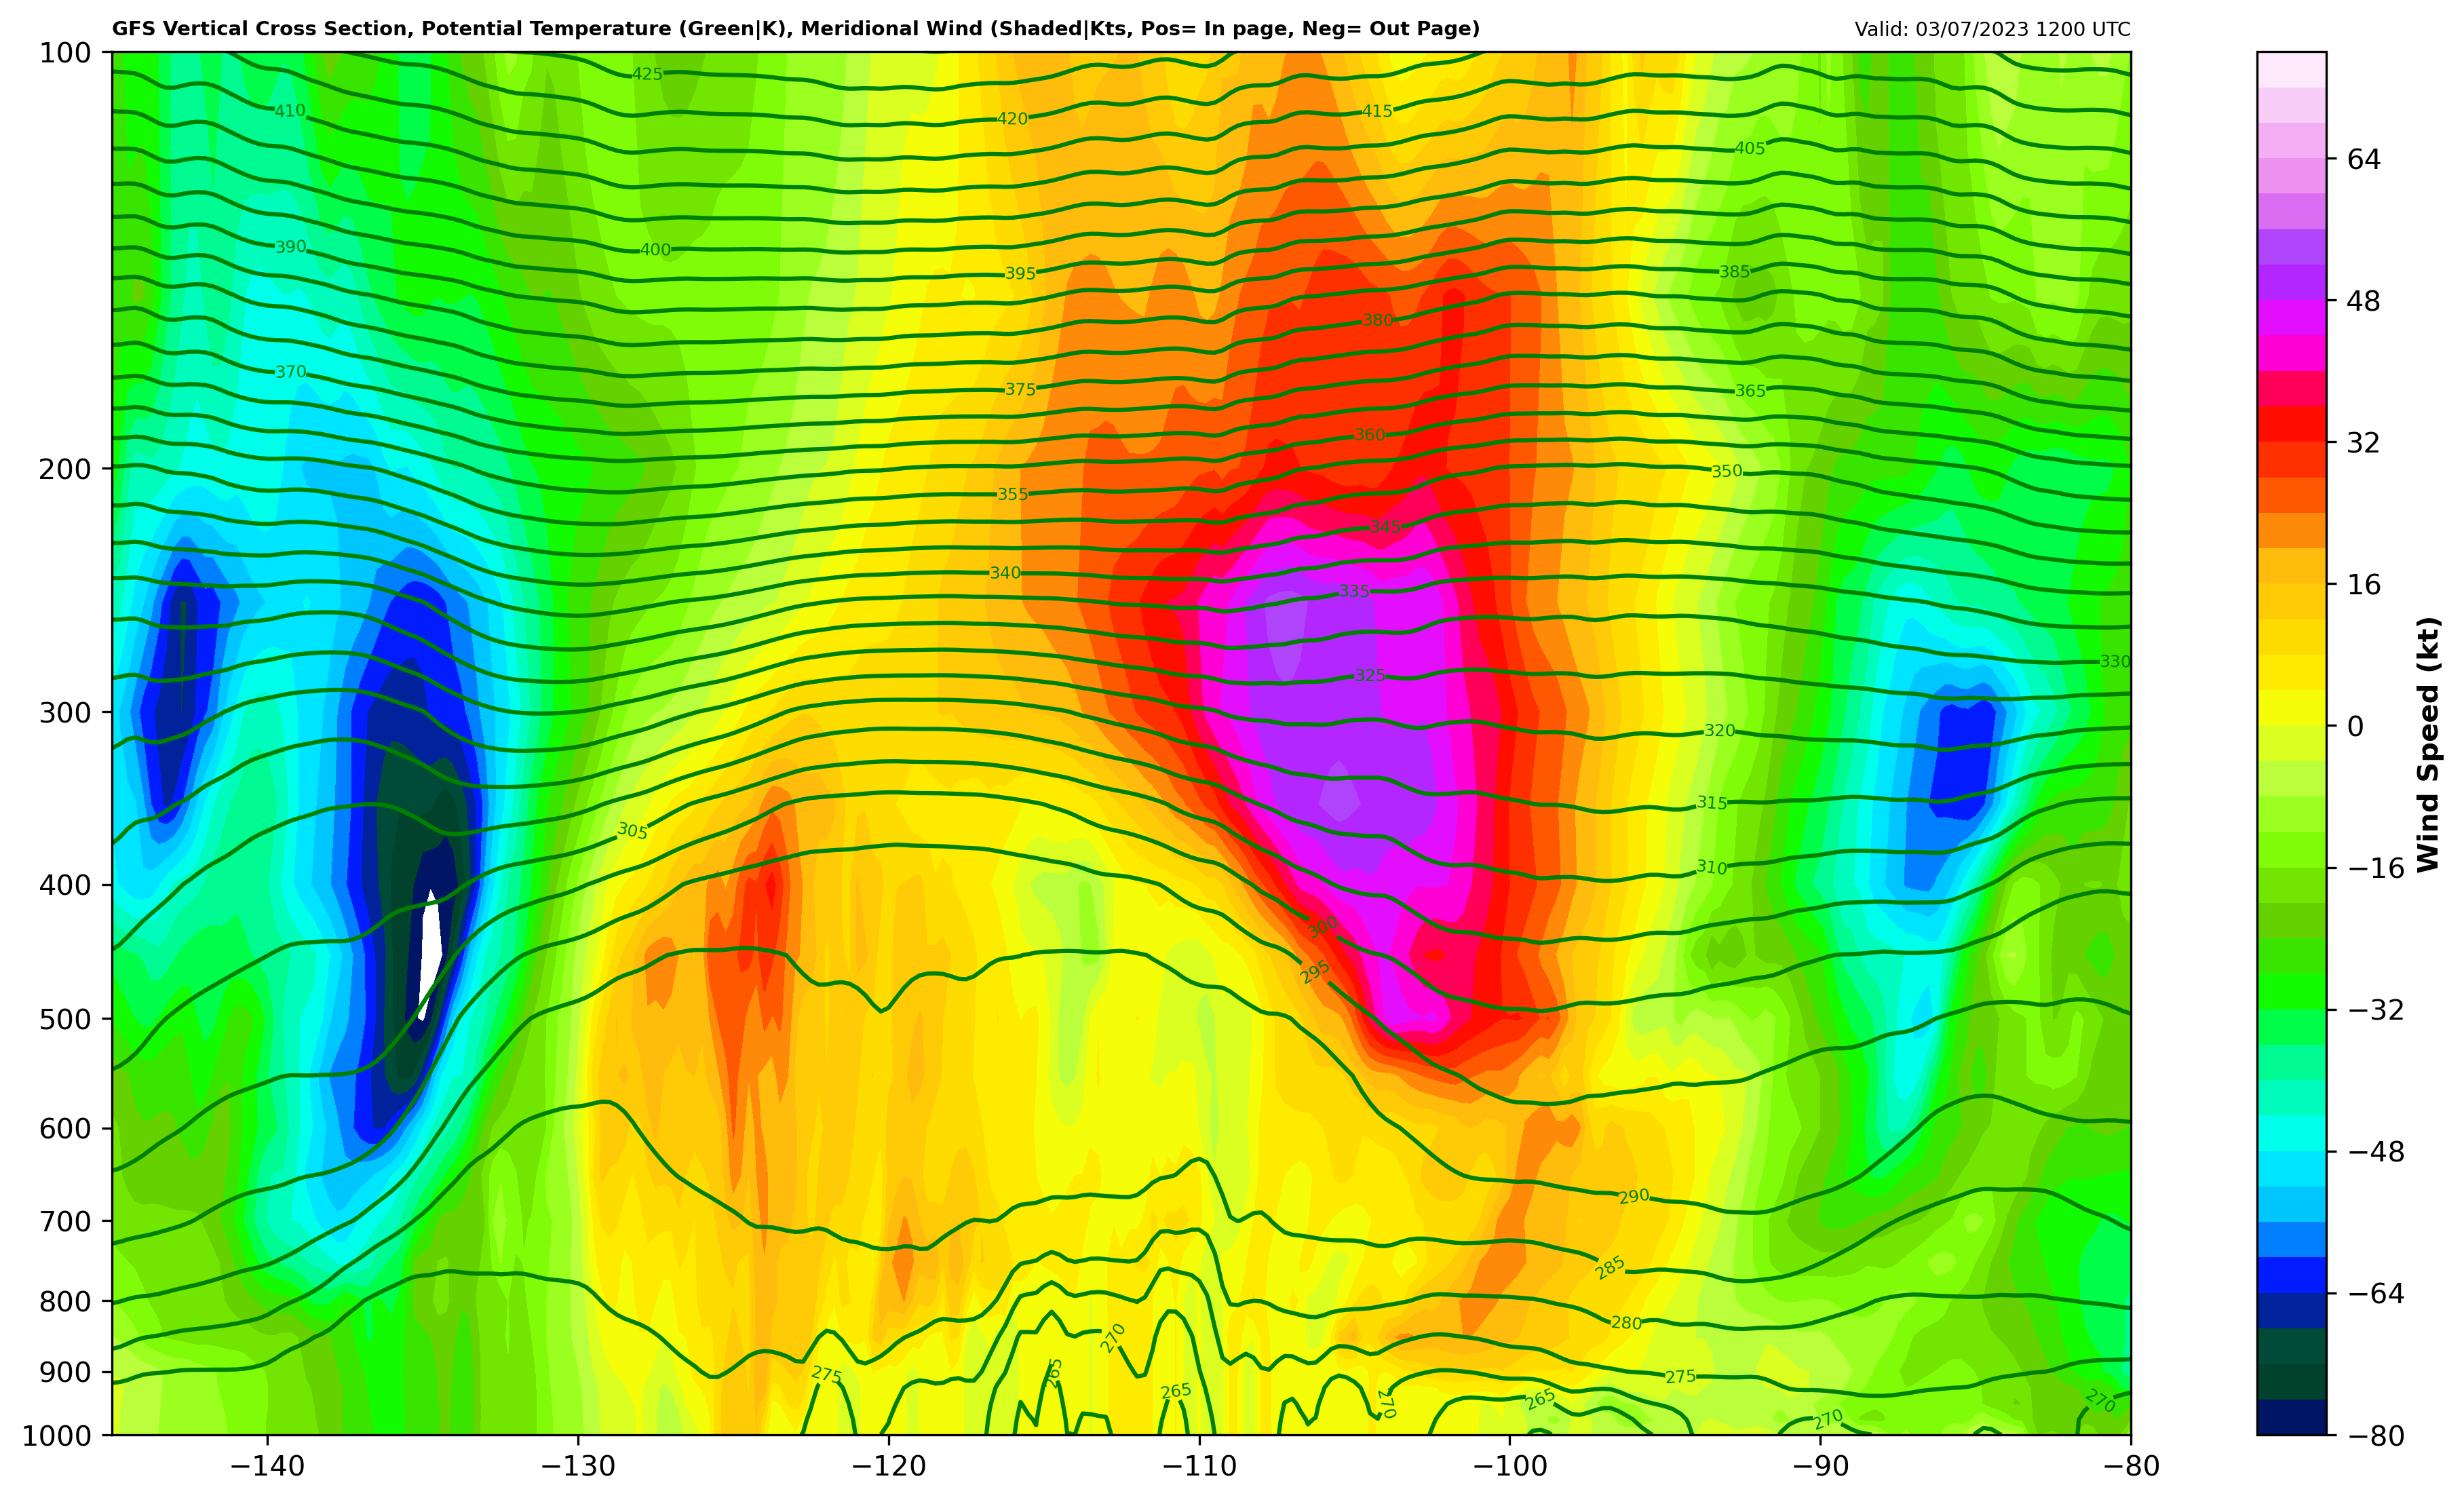

In [5]:
time=datetime(2023,3,7,12)
model_data=process_upper_air_data(time)
cross_section1(model_data,time)

In [6]:
def cross_section2(model_data,time):
    cross=model_data.sel(latitude=25)
    cross = cross.sel(longitude = slice(360-120,360-85))
    
    fig = plt.figure(figsize=(16,9), dpi=300)
    ax = plt.subplot()

    cont = plt.contour(cross.longitude-360, cross.isobaricInhPa.values, gaussian_filter(cross.pt.values,1), np.arange(230,900,5),colors='g')
    ax.clabel(cont, cont.levels, inline=True, fontsize=6)


    ax.set_yscale('symlog')


    plt.ylim(1000,100)
   
        
    contw = plt.contourf(cross.longitude-360,cross.isobaricInhPa,gaussian_filter(cross.v.values,0),np.arange(-80,80,4), cmap='gist_ncar')
           
    
    cbar = plt.colorbar(contw)
    cbar.set_label(("Wind Speed (kt)"), size=10, weight="bold")

    ax.set_yticks(np.arange(1000, 50, -100))
    ax.set_yticklabels(np.arange(1000, 50, -100))
    
    plt.title(f"Valid: {time:%m/%d/%Y %H%M} UTC", size=7, loc="right")         
    plt.title("GFS Vertical Cross Section, Potential Temperature (Green|K), Meridional Wind (Shaded|Kts, Pos= In page, Neg= Out Page) ",size=7,weight="bold",loc="left")

Can't create file '/data/AtmSci360/Synp2/Lab_9/030723_12_gfs.grib2.923a8.idx'
Traceback (most recent call last):
  File "/opt/tljh/user/lib/python3.7/site-packages/cfgrib/messages.py", line 534, in from_indexpath_or_filestream
    with compat_create_exclusive(indexpath) as new_index_file:
  File "/opt/tljh/user/lib/python3.7/contextlib.py", line 112, in __enter__
    return next(self.gen)
  File "/opt/tljh/user/lib/python3.7/site-packages/cfgrib/messages.py", line 500, in compat_create_exclusive
    fd = os.open(path, os.O_WRONLY | os.O_CREAT | os.O_EXCL)
PermissionError: [Errno 13] Permission denied: '/data/AtmSci360/Synp2/Lab_9/030723_12_gfs.grib2.923a8.idx'
Can't read index file '/data/AtmSci360/Synp2/Lab_9/030723_12_gfs.grib2.923a8.idx'
Traceback (most recent call last):
  File "/opt/tljh/user/lib/python3.7/site-packages/cfgrib/messages.py", line 544, in from_indexpath_or_filestream
    index_mtime = os.path.getmtime(indexpath)
  File "/opt/tljh/user/lib/python3.7/genericpath.py", 

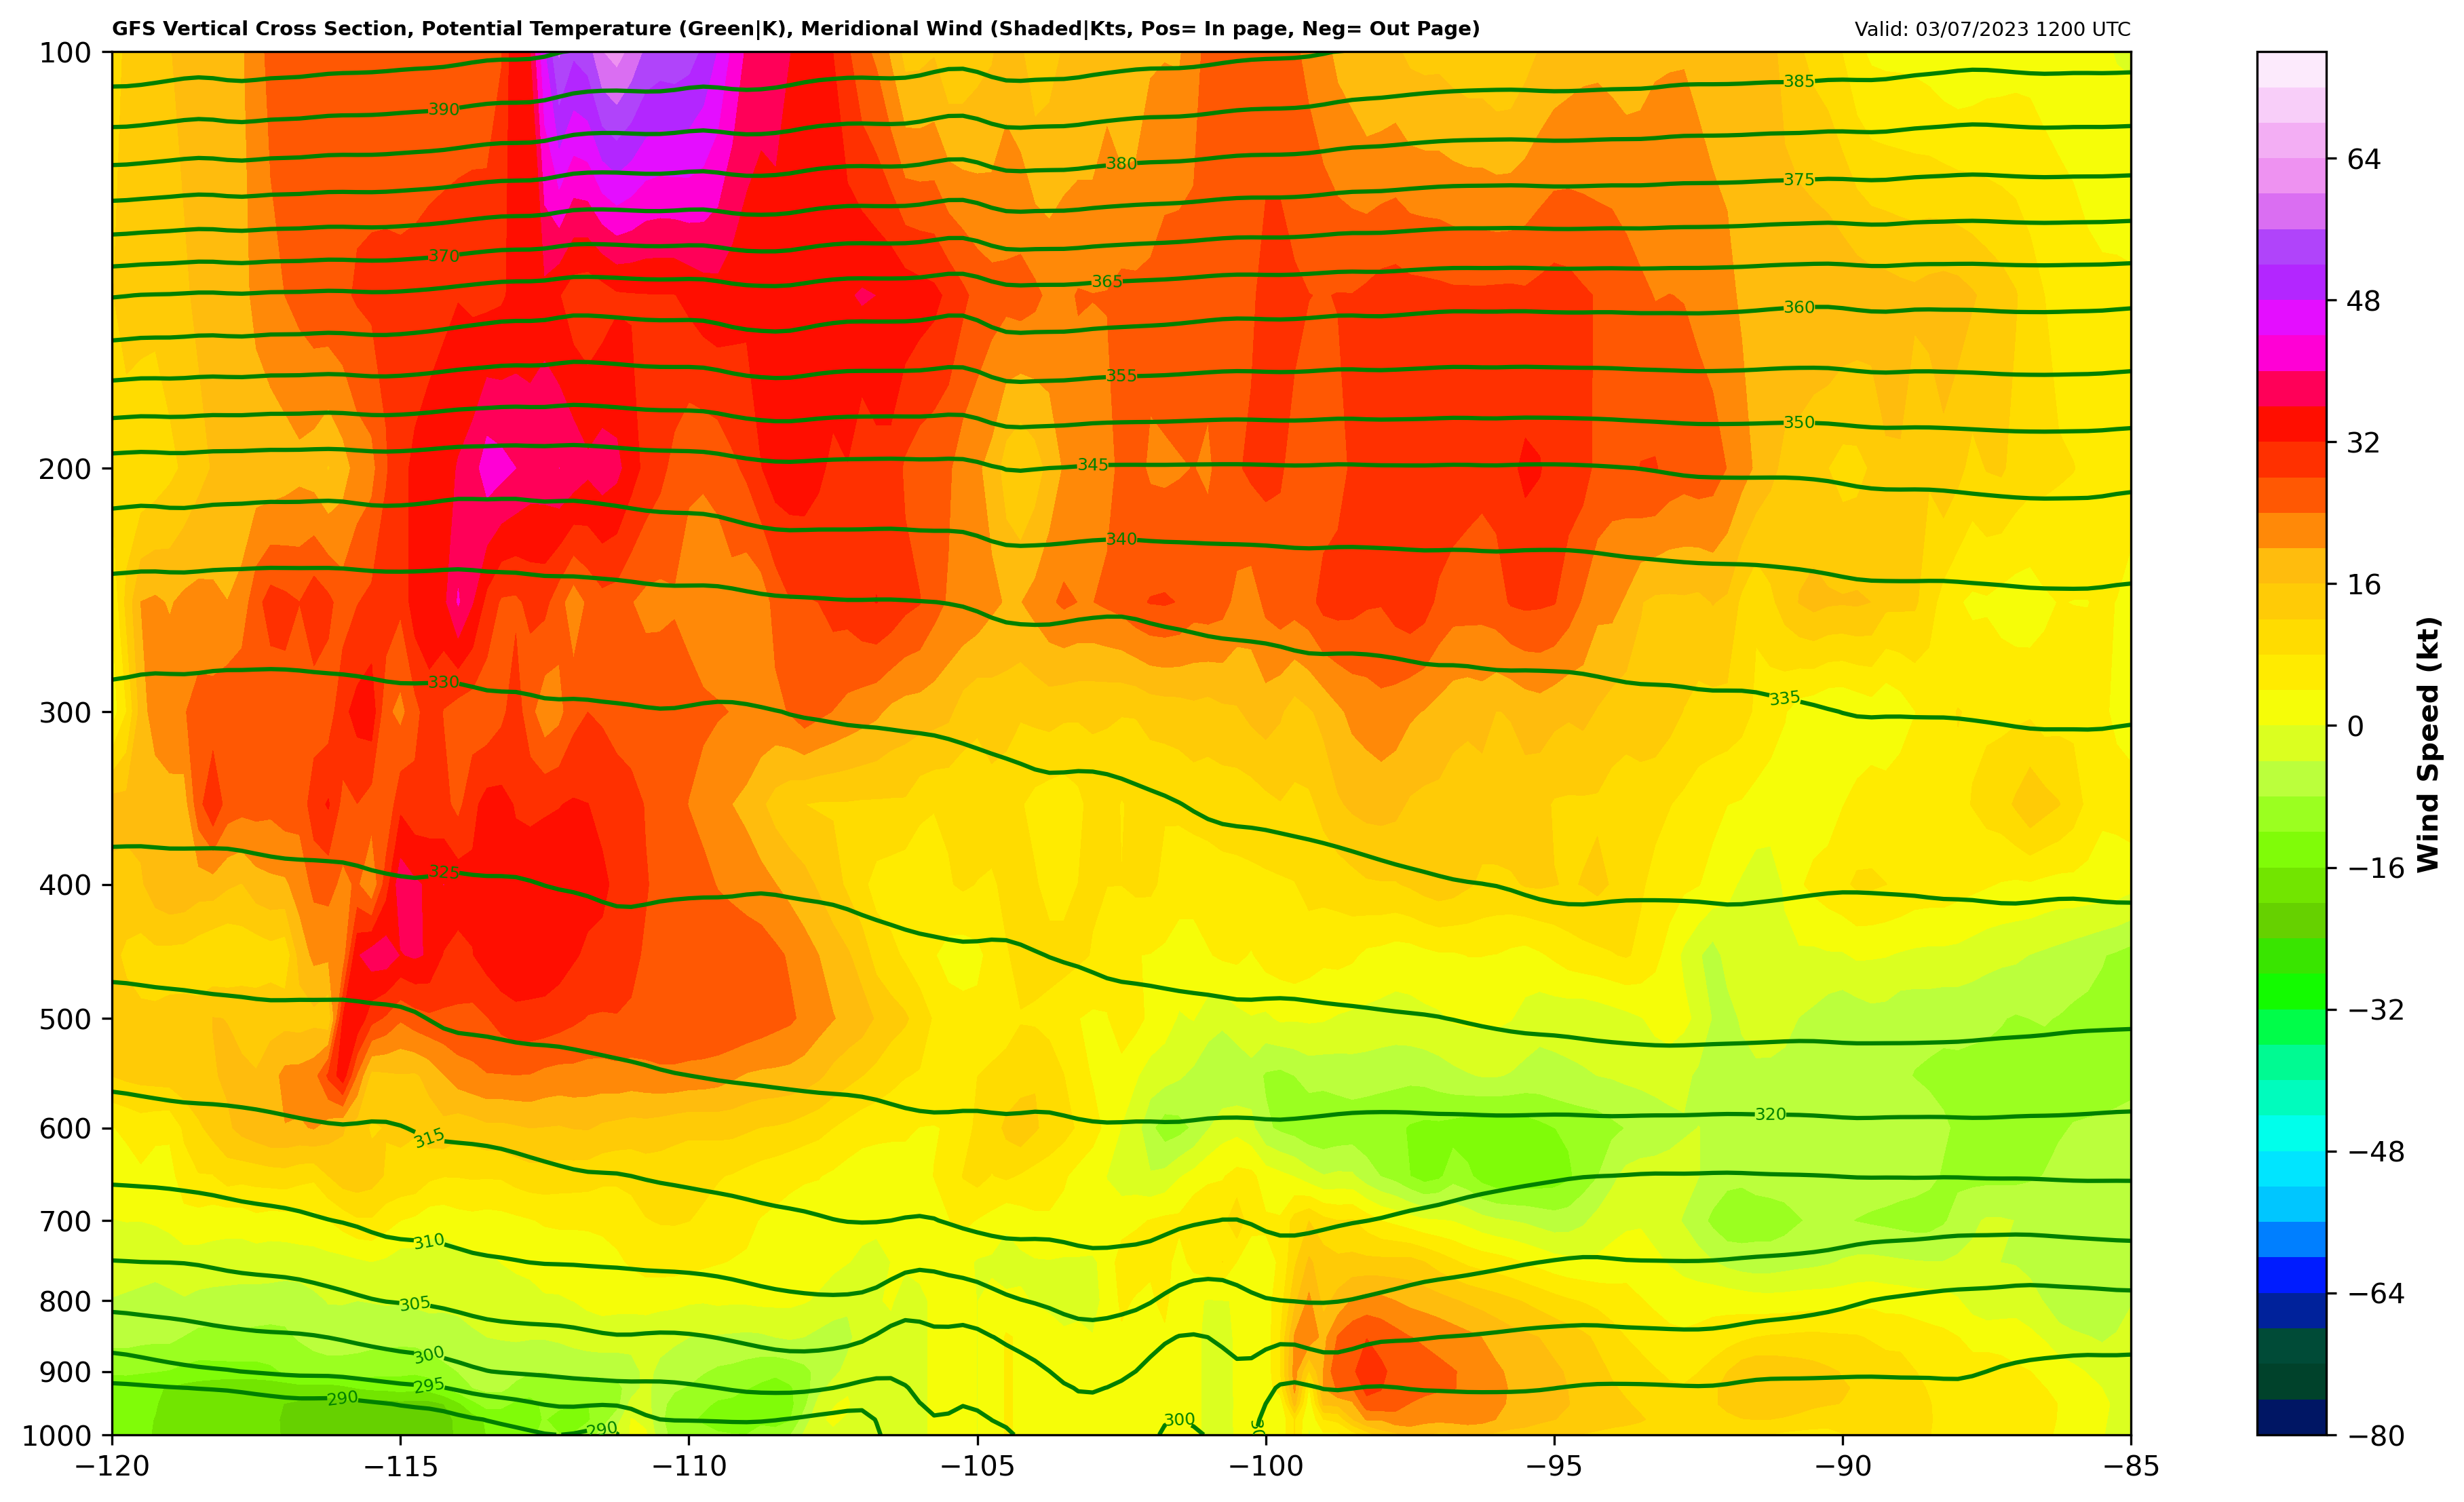

In [7]:
time=datetime(2023,3,7,12)
model_data=process_upper_air_data(time)
cross_section2(model_data,time)